## MLP to explain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import shuffle
from sklearn.utils import shuffle

import seaborn as sns
import random

In [2]:
# Import gene_expression_data
gene_expression_data = pd.read_csv('../data/gene_expression_data.csv', index_col=0)

gene_expression_data = gene_expression_data.T

In [3]:

# add column named state with progressing or stable if row contains _P or _S
for index, row in gene_expression_data.iterrows():
    if '_P' in index:
        gene_expression_data.loc[index, 'state'] = 1
    elif '_S' in index:
        gene_expression_data.loc[index, 'state'] = 0


In [4]:
NO_MINSAMPLING = False
NO_LOG2 = False
MIN = False

if NO_LOG2 == False:
    gene_expression_data = np.log2(gene_expression_data + 1)

In [5]:

# set random seed
random.seed(90)



# undersample the data
# get the number of rows with state 0
state_0 = gene_expression_data[gene_expression_data['state'] == 0]
state_1 = gene_expression_data[gene_expression_data['state'] == 1]

# get the number of rows with state 1
state_0_count = state_0.shape[0]
state_1_count = state_1.shape[0]


if MIN:
    # get the minimum number of rows
    min_count = min(state_0_count, state_1_count)

    # get the same number of rows for each state
    state_0 = state_0.sample(min_count)
    state_1 = state_1.sample(min_count)

# concatenate the two dataframes
gene_expression_data = pd.concat([state_0, state_1])



# shuffle rows of gene_expression_data

gene_expression_data = shuffle(gene_expression_data, random_state=90)


#train_data.shape, test_data.shape # 50 - 14 - 14 split
#train_data = gene_expression_data.iloc[:50, :]
#valid_data = gene_expression_data.iloc[50:64, :]
# Rest to the test data
#test_data = gene_expression_data.iloc[64:, :]

# take 70% for training and 70  for testing
train_data = gene_expression_data.iloc[:gene_expression_data.shape[0] * 70 // 100, :]
test_data = gene_expression_data.iloc[:gene_expression_data.shape[0] * 30 // 100, :]
valid_data = test_data



""" train_data = gene_expression_data.iloc[:220, :]
valid_data = gene_expression_data.iloc[220:280, :]
# Rest to the test data
test_data = gene_expression_data.iloc[300:, :]
 """
#shape
# count state in the three datasets

    

# get the train and valid data
X_train = train_data
y_train = train_data['state']

X_valid = valid_data
y_valid = valid_data['state']

In [6]:
gene_list = ["234764_x_at", "211835_at", "1561937_x_at", "202716_at",
                  "235305_s_at", "210538_s_at", "237461_at", "41660_at", "217892_s_at", 
                  "225822_at", "57532_at", "213489_at", "222641_s_at", "205159_at",
                  "209012_at", "220522_at", "223709_s_at", "36129_at",
                  "201848_s_at", "212704_at", "213622_at", "232531_at", 
                  "205666_at", "210789_x_at", "217809_at", "225291_at", 
                  "226488_at", "231131_at", "238662_at", "226098_at", "202387_at",
                  "228217_s_at", "225553_at", "223995_at", "202613_at", "203200_s_at"]



In [7]:
import tensorflow as tf
from tensorflow import keras

# Trying using the feature extracted from ge

In [8]:
selected_features_genetic = ['1007_s_at', '121_at', '1255_g_at', '1294_at', '1316_at', '1320_at','1431_at',
 '1552256_a_at', '1552258_at', '1552263_at', '1552264_a_at', '1552266_at',
 '1552271_at', '1552272_a_at', '1552274_at', '1552275_s_at', '1552276_a_at',
 '1552277_a_at', '1552278_a_at', '1552286_at', '1552287_s_at', '1552288_at',
 '1552293_at', '1552295_a_at', '1552296_at', '1552299_at', '1552301_a_at',
 '1552304_at', '1552306_at', '1552307_a_at', '1552311_a_at', '1552312_a_at',
 '1552314_a_at', '1552315_at', '1552316_a_at', '1552319_a_at', '1552320_a_at',
 '1552322_at', '1552325_at', '1552327_at', '1552330_at', '1552332_at',
 '1552337_s_at', '1552340_at', '1552343_s_at', '1552344_s_at', '1552348_at']

C:\Users\cenzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,102 (58.99 KB)

 Trainable params: 15,102 (58.99 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.4636 - loss: 14.8199 - val_accuracy: 0.8785 - val_loss: 13.1689
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7949 - loss: 13.0723 - val_accuracy: 0.8785 - val_loss: 12.4307
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8338 - loss: 12.3542 - val_accuracy: 0.8785 - val_loss: 11.5526
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8713 - loss: 11.5177 - val_accuracy: 0.8785 - val_loss: 10.7016
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7961 - loss: 10.7289 - val_accuracy: 0.8785 - val_loss: 9.9406
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7926 - loss: 9.9534 - val_accuracy: 0.8785 - val_loss: 9.2326
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8647 - loss: 9.0880 - val_accuracy: 0.8785 - val_loss: 8.5350
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8936 - loss: 8.3567 - val_accuracy: 0.8785 -

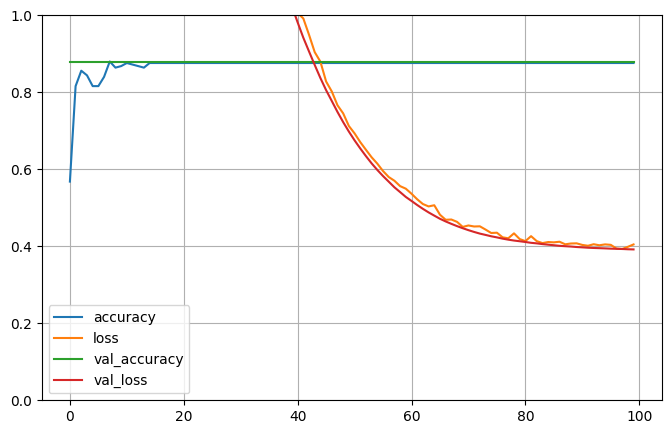

In [9]:
# Implement an MLP using as input_shape len(gene_expression_data.columns) - 1
# Use L1 regularization for the first layers 
# As output layer we need a 2 neuron since we're doing binary classification


model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[len(selected_features_genetic)],
                       kernel_regularizer=keras.regularizers.l1(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="relu", kernel_regularizer=keras.regularizers.l1(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation="sigmoid")
])

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

model.summary()

# use for training only the dataset by filtering the selected_features_genetic
history = model.fit(X_train[selected_features_genetic], y_train, epochs=100, validation_data=(X_valid[selected_features_genetic], y_valid))
# Train the model
#history = model.fit(X_train.drop('state', axis=1), y_train, epochs=100, validation_data=(X_valid.drop('state', axis=1), y_valid))

# Evaluate the model
model.evaluate(X_valid[selected_features_genetic], y_valid)

# Plot the learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [17]:
# get F1 and accuracy
from sklearn.metrics import f1_score, accuracy_score

y_pred = model.predict(X_valid[selected_features_genetic])
y_pred = np.argmax(y_pred, axis=1)

print(f"F1 score: {f1_score(y_valid, y_pred)}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
F1 score: 0.0


In [18]:
# Let's use Shap to explain MLP predictions
import shap

# Create an explainer
explainer = shap.KernelExplainer(model.predict, X_train[selected_features_genetic])

# Explain the first 10 predictions
shap_values = explainer.shap_values(X_valid[selected_features_genetic].iloc[:3], nsamples=100)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Using 250 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/3 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [20]:
# plot shap..
